In [1]:
# Basic utilities
import os
import csv
import pandas as pd
import numpy as np


# Transformers
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, TransformerMixin

# Models
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

#methods
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

#tools
from sklearn.utils.multiclass import type_of_target
from sklearn.base import BaseEstimator
from sklearn.exceptions import NotFittedError
from sklearn.base import clone
from sklearn.utils.multiclass import unique_labels, type_of_target
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import indexable
from sklearn.utils import _safe_indexing as safe_indexing 
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics._classification import _check_targets
from sklearn.metrics._classification import _check_targets
from sklearn.utils import check_X_y
from sklearn.base import is_regressor as sk_is_regressor
from sklearn.base import is_classifier as sk_is_classifier
from sklearn.base import is_outlier_detector as sk_is_outlier_detector


In [2]:
df = pd.read_csv('/Users/wuc3/Downloads/Capstone/Capstone 2/DryBeanDataset/Dry_Bean_Dataset.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.shape


(13611, 17)

In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [21]:
X = df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']]
y = df['Class']

In [22]:
X.shape

(13611, 16)

In [23]:
y.shape

(13611,)

In [24]:
y.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

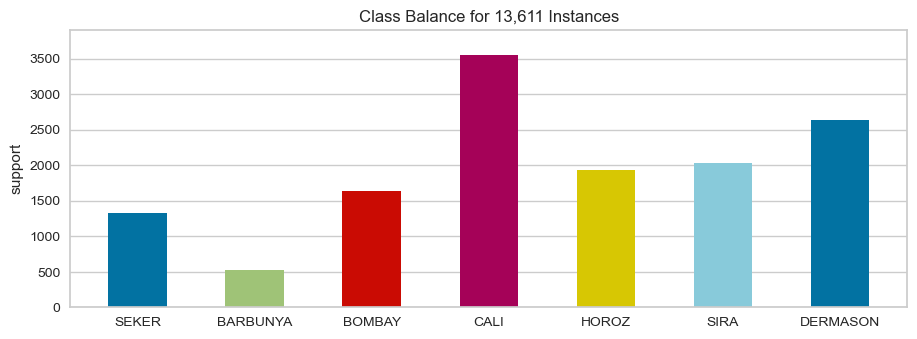

<AxesSubplot:title={'center':'Class Balance for 13,611 Instances'}, ylabel='support'>

In [66]:
from yellowbrick.target import ClassBalance
# Instantiate the visualizer
visualizer = ClassBalance(
    labels=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'], size=(1080,360)
)

visualizer.fit(y)
visualizer.show()

EDA analysis

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>]], dtype=object)

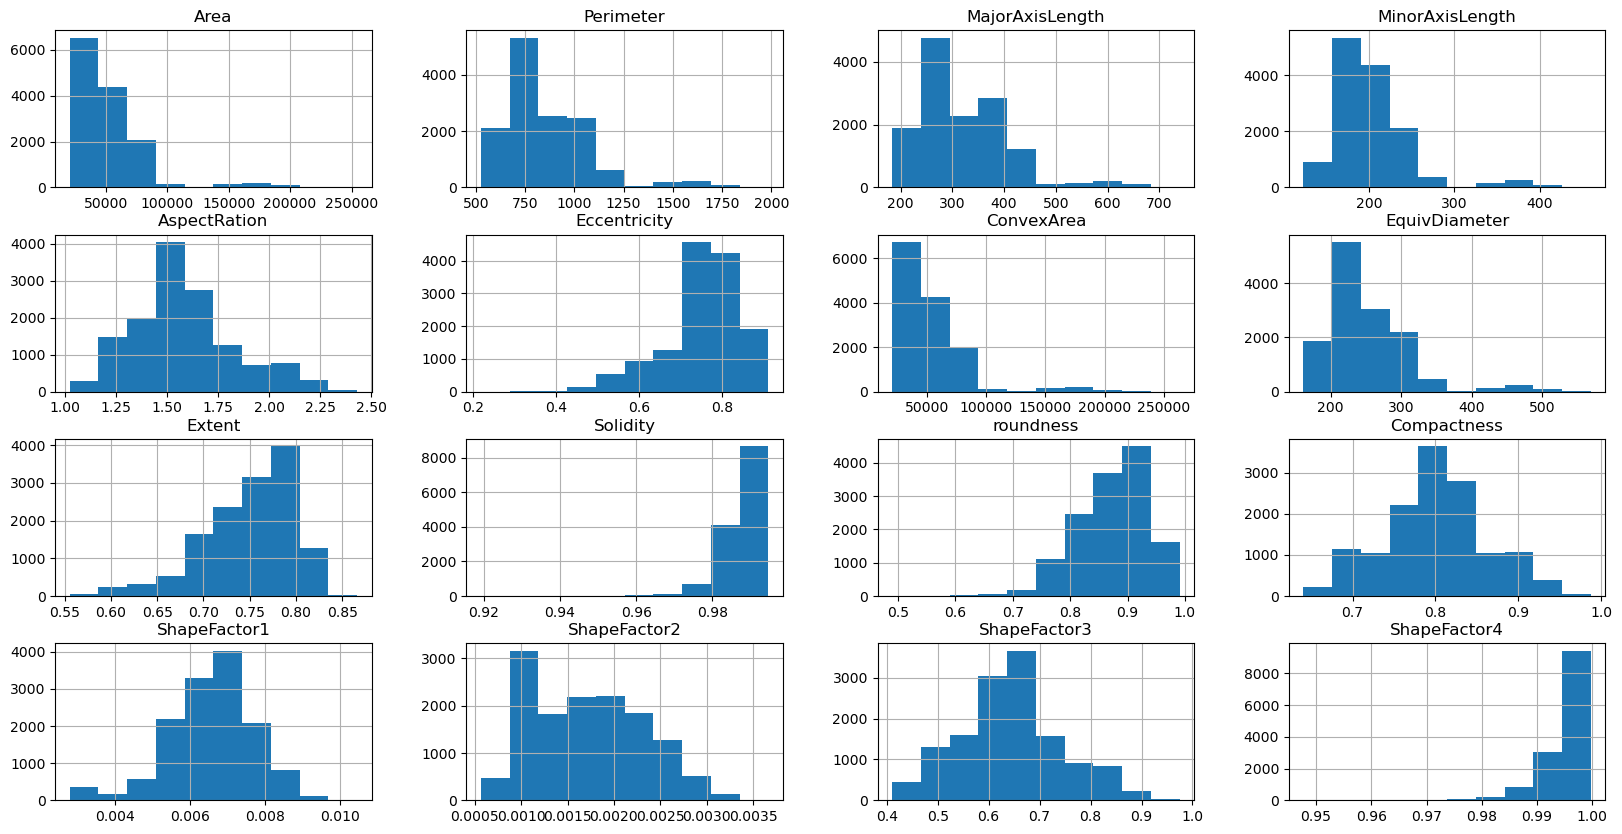

In [25]:
X.hist(figsize=(20,10))

<AxesSubplot:>

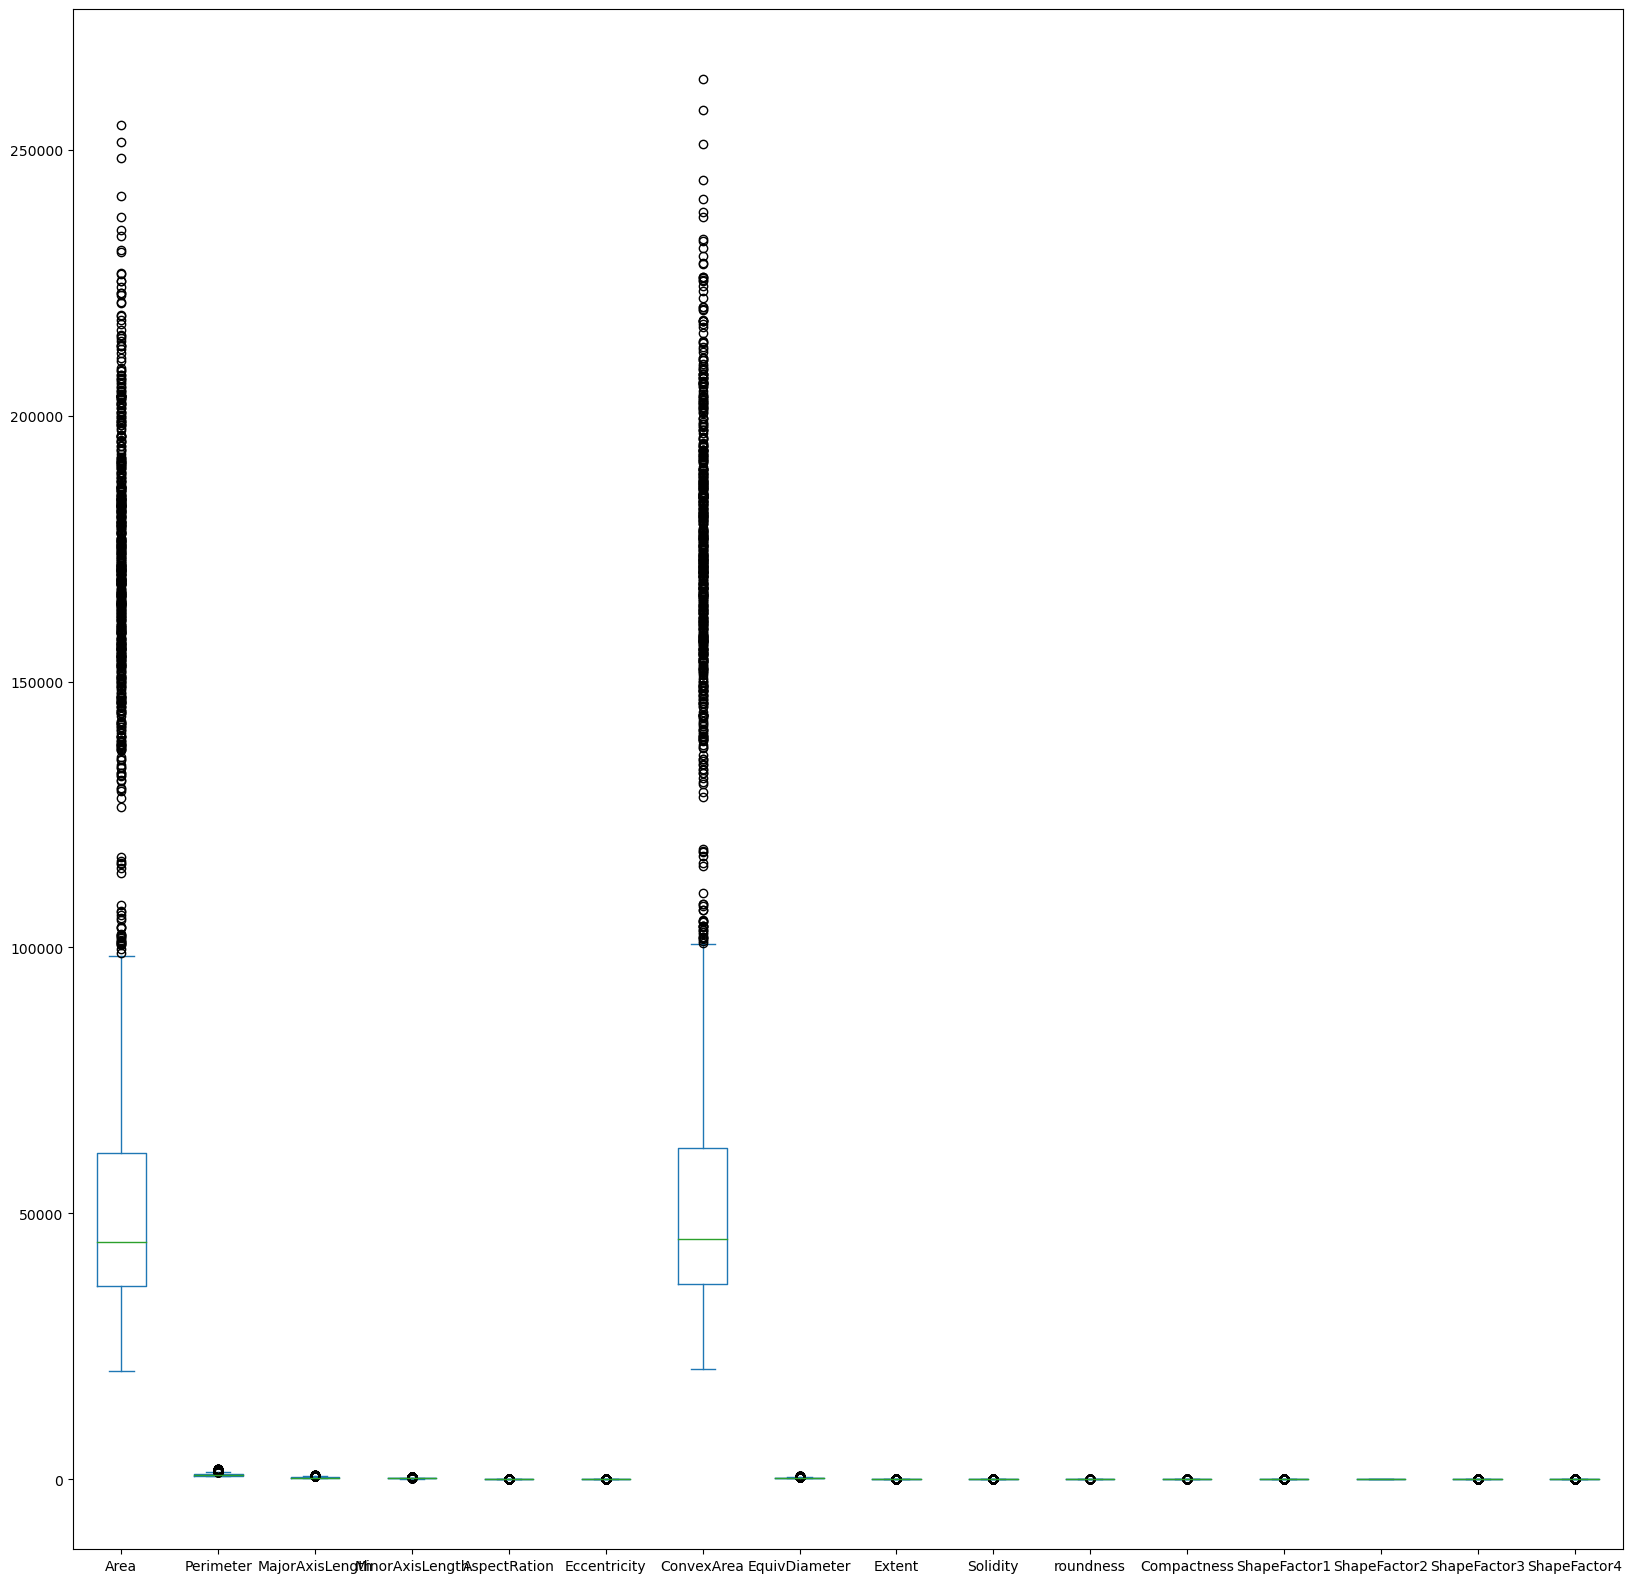

In [26]:
X.plot(kind='box',figsize=(20,20))

In [43]:
from sklearn.preprocessing import MinMaxScaler
MMS= MinMaxScaler().fit(X)
X=MMS.transform(X)

<AxesSubplot:>

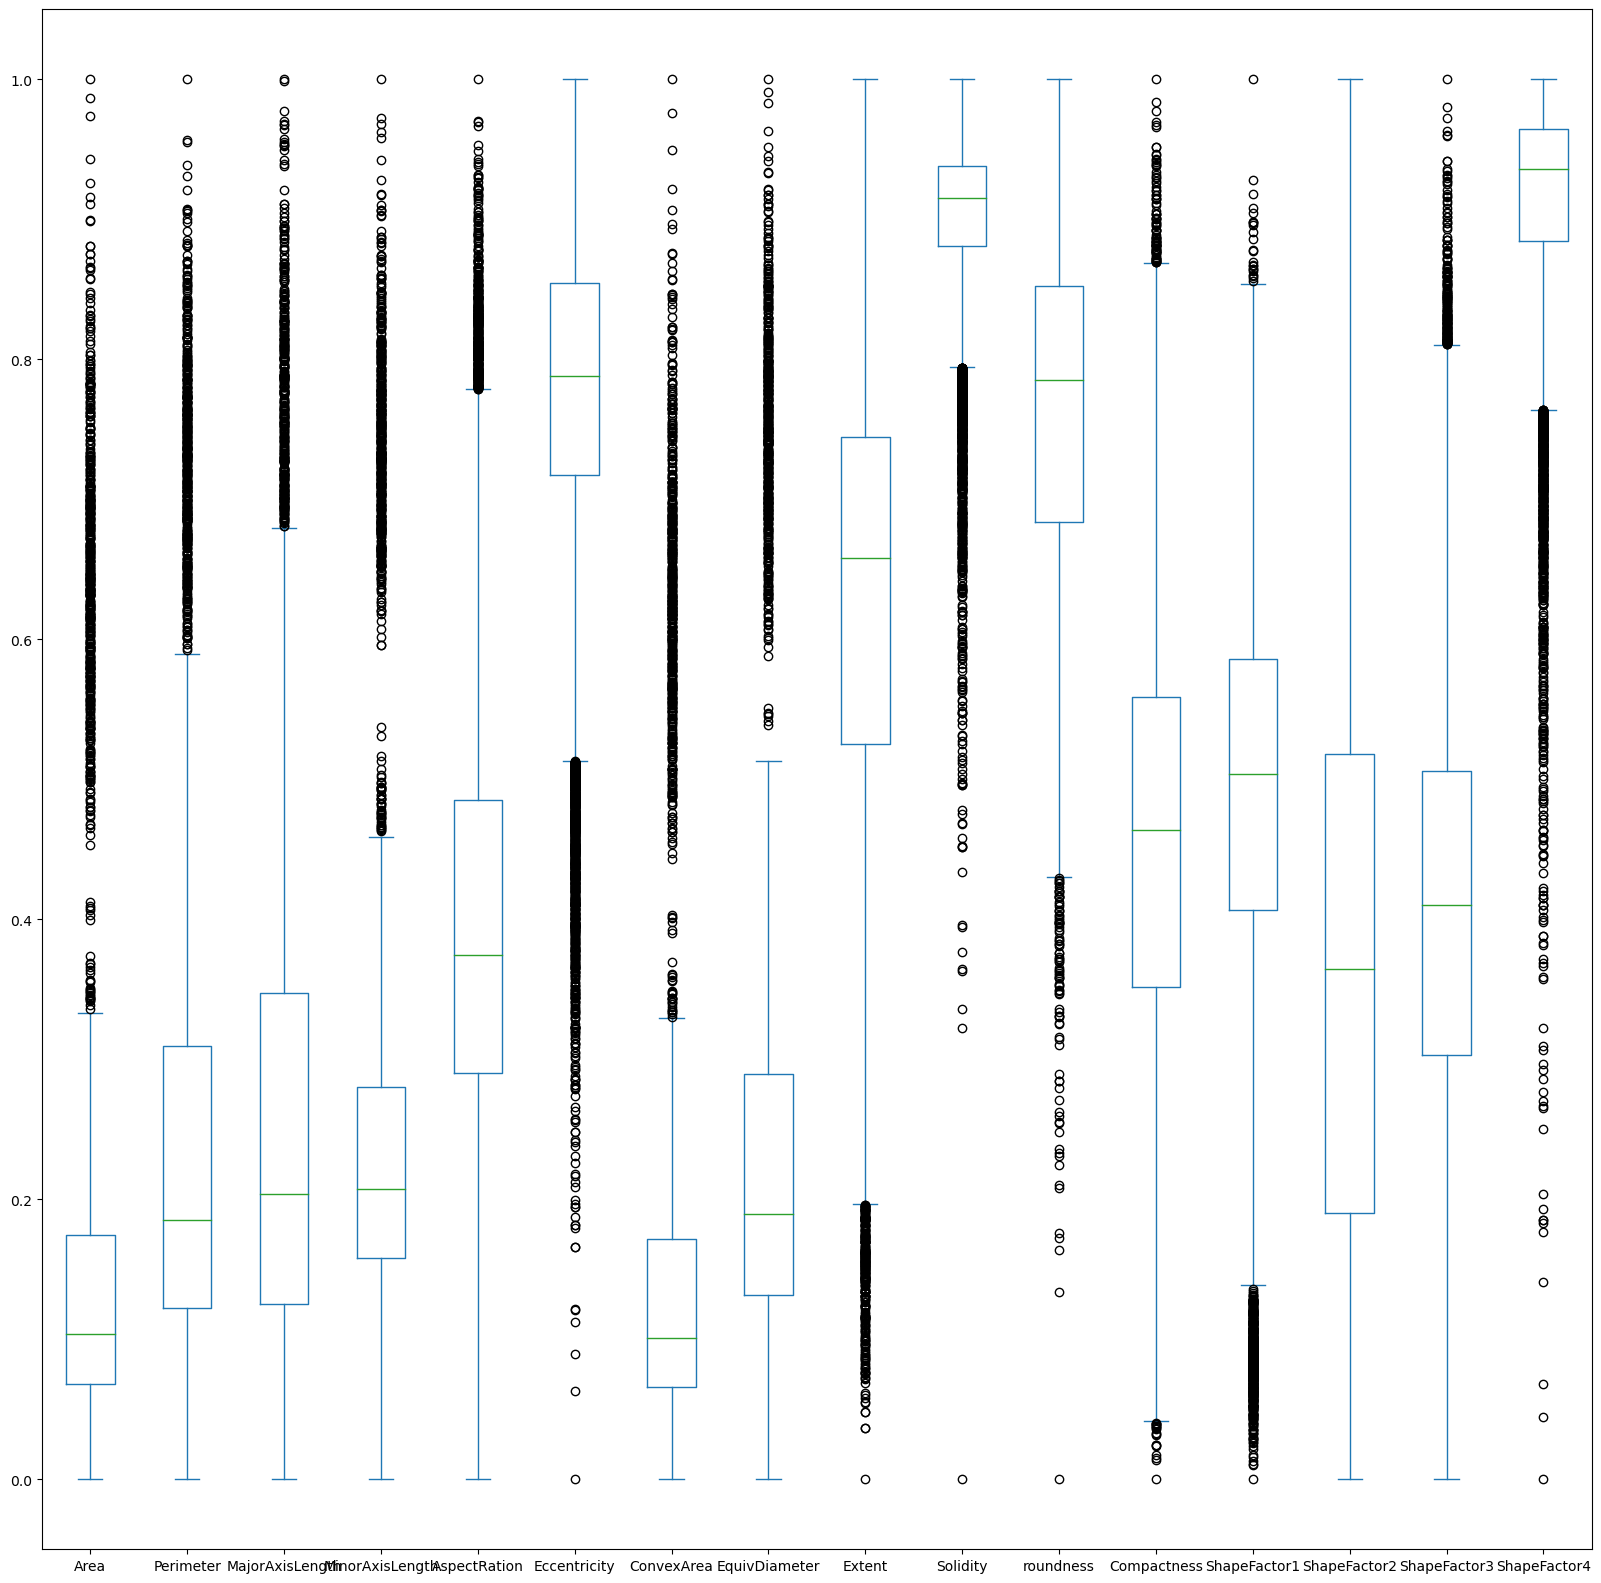

In [29]:
 pd.DataFrame(X,columns=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']).plot(kind='box',figsize=(20,20))

## Use Scaler and Normalizer for numeric data
## y variable will be categorized automatically upon fit


# define X_train, y_train, X_test, y_test

In [48]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

In [49]:
LE = LabelEncoder().fit(y)
y_train = LE.transform(y_train)
y_test = LE.transform(y_test)

## Min-Max scaler

In [52]:
from sklearn.preprocessing import MinMaxScaler
MMS= MinMaxScaler().fit(X)
X=MMS.transform(X)
X_train=MMS.transform(X_train)
X_test=MMS.transform(X_test)

<AxesSubplot:>

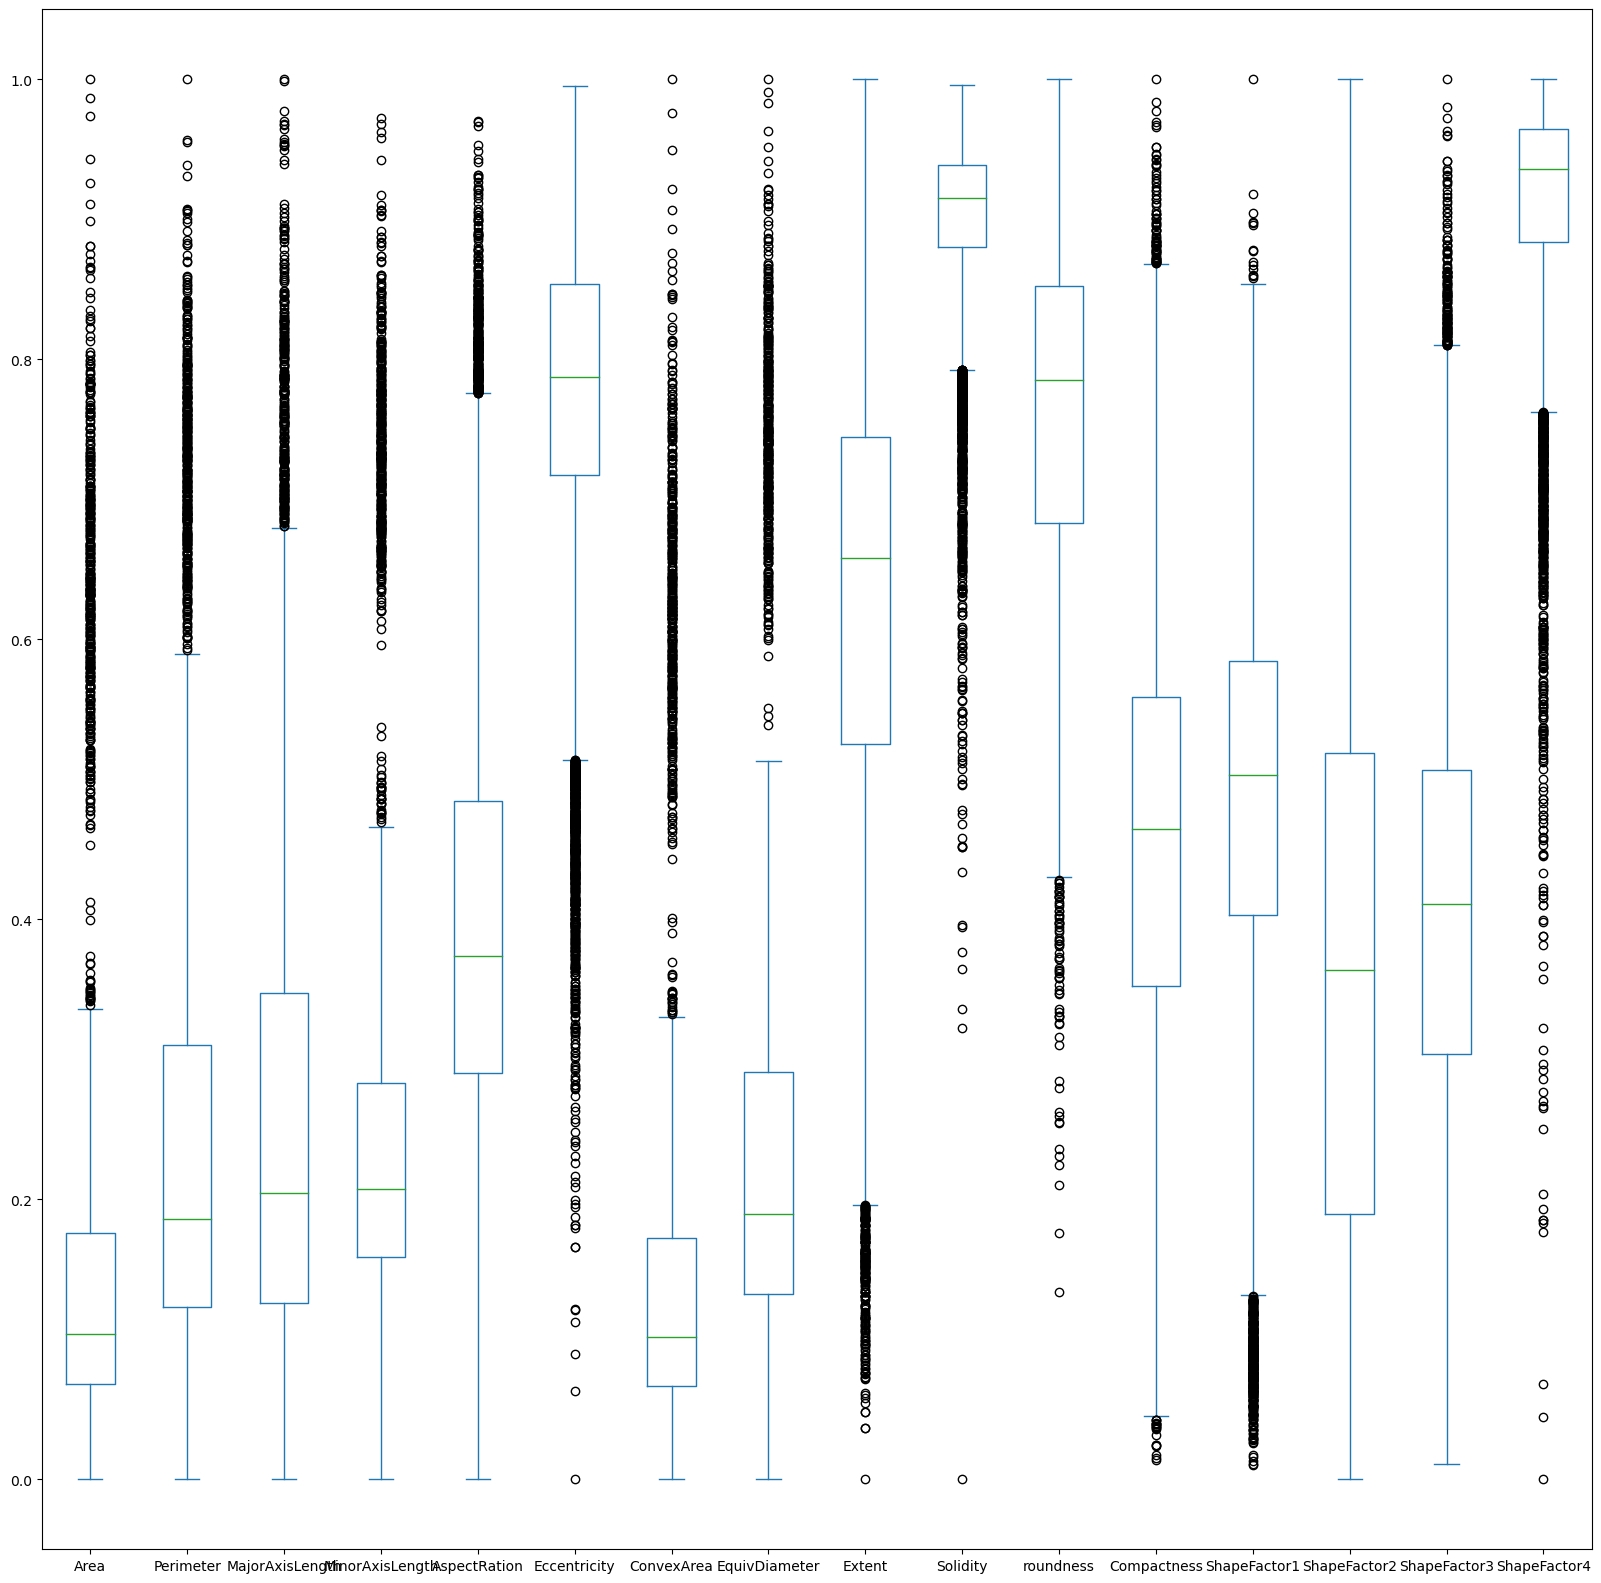

In [50]:
 pd.DataFrame(X_train,columns=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']).plot(kind='box',figsize=(20,20))

/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


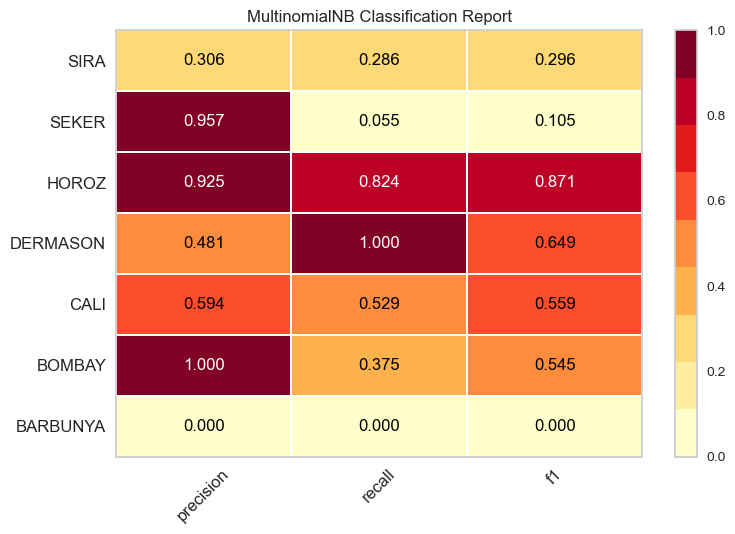

<AxesSubplot:title={'center':'MultinomialNB Classification Report'}>

In [53]:
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(MultinomialNB(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

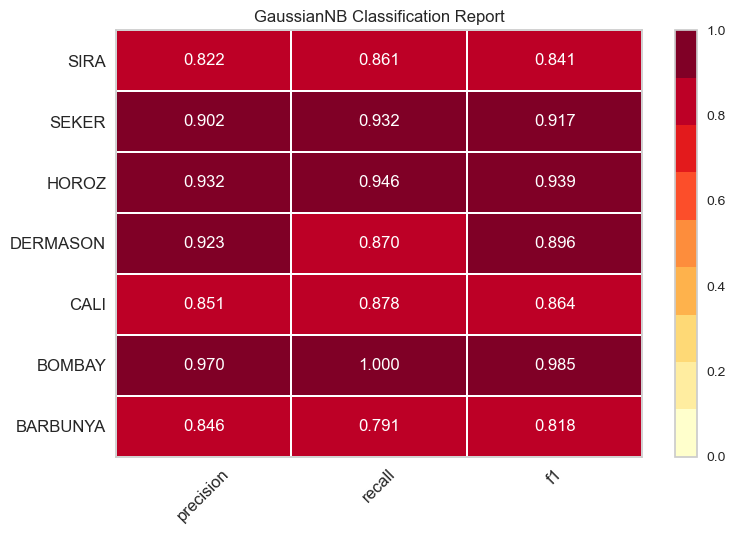

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [54]:
#Try Gaussian
import numpy as np
from scipy.sparse import csr_matrix
X_train=csr_matrix(X_train).toarray()
X_test=csr_matrix(X_test).toarray()

from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(GaussianNB(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

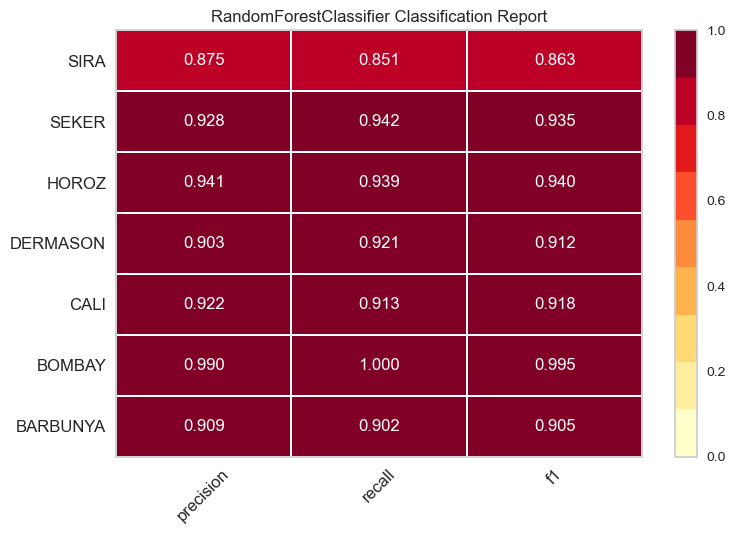

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [55]:
# try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport( RandomForestClassifier(n_estimators=100),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

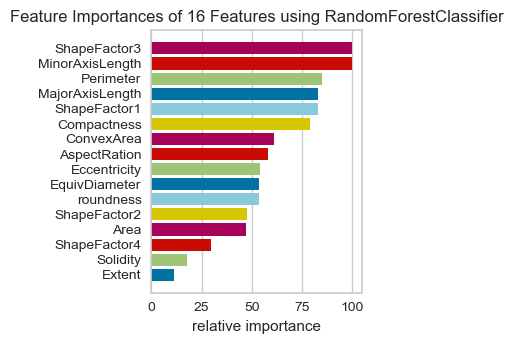

<AxesSubplot:title={'center':'Feature Importances of 16 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [63]:
#FeatureImportances for RandomForestClassifier
from yellowbrick.features import FeatureImportances
labels=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
viz = FeatureImportances( RandomForestClassifier(n_estimators=100), size=(360, 360),labels=labels)
viz.fit(X, y)
viz.show()

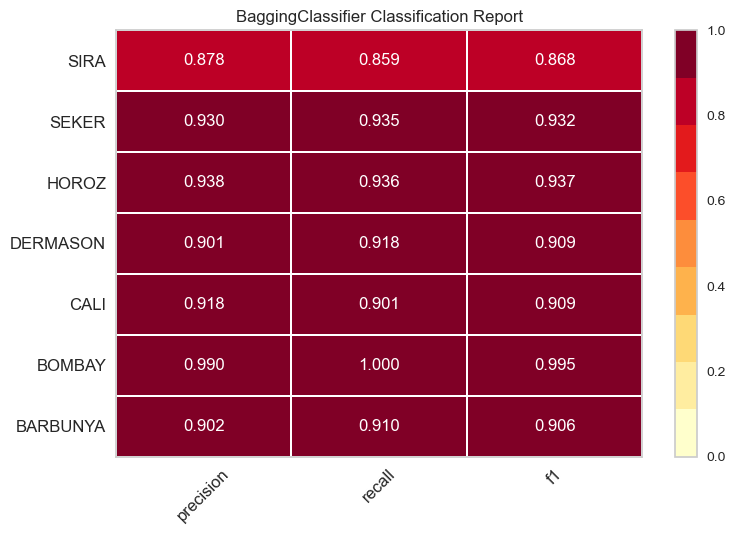

<AxesSubplot:title={'center':'BaggingClassifier Classification Report'}>

In [67]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(BaggingClassifier(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

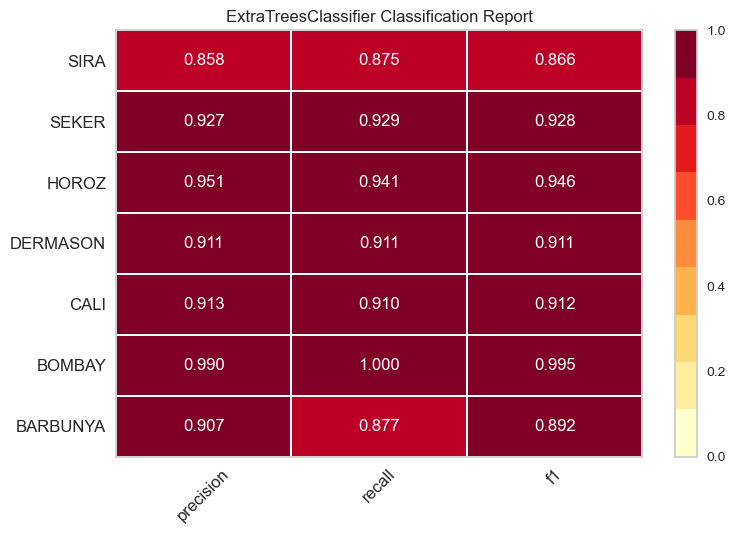

<AxesSubplot:title={'center':'ExtraTreesClassifier Classification Report'}>

In [69]:
#ExtraTreesClassifier()
from sklearn.ensemble import ExtraTreesClassifier
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(ExtraTreesClassifier(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

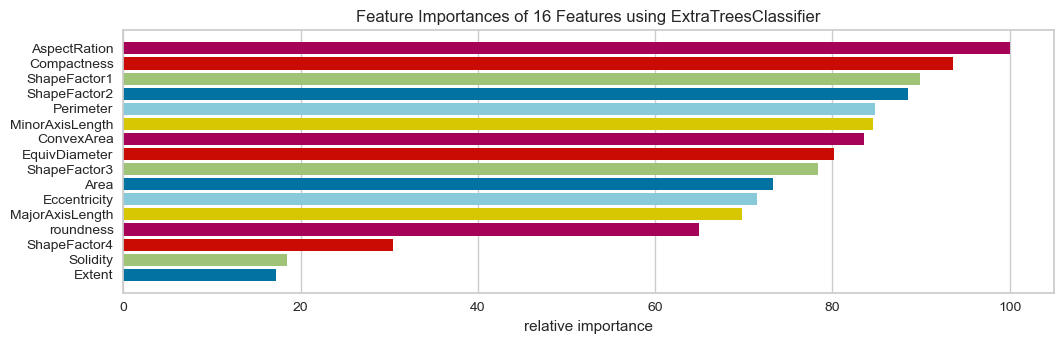

<AxesSubplot:title={'center':'Feature Importances of 16 Features using ExtraTreesClassifier'}, xlabel='relative importance'>

In [70]:
from yellowbrick.features import FeatureImportances
labels=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
viz = FeatureImportances( ExtraTreesClassifier(), size=(1080, 360),labels=labels)
viz.fit(X, y)
viz.show()

Try SVM; and different options (linear, OvR, etc.); gridsearch

/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

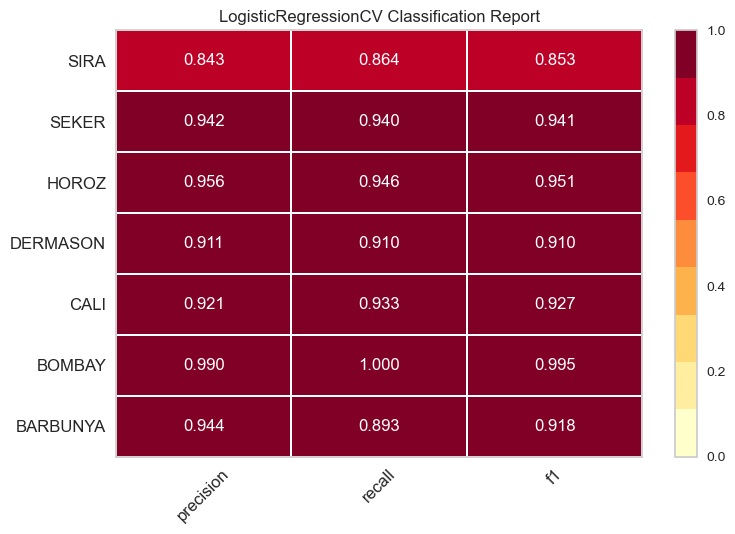

<AxesSubplot:title={'center':'LogisticRegressionCV Classification Report'}>

In [71]:
#LogisticRegressionCV(cv=3)
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(LogisticRegressionCV(cv=3),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

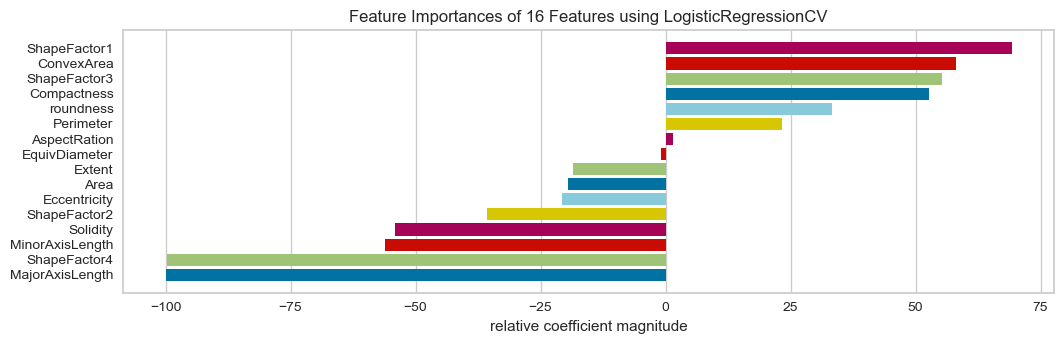

<AxesSubplot:title={'center':'Feature Importances of 16 Features using LogisticRegressionCV'}, xlabel='relative coefficient magnitude'>

In [72]:
#FeatureImportances of LogisticRegressionCV(cv=3)
from yellowbrick.features import FeatureImportances
viz = FeatureImportances( LogisticRegressionCV(cv=3), size=(1080, 360), labels=labels)
viz.fit(X, y)
viz.show()

/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


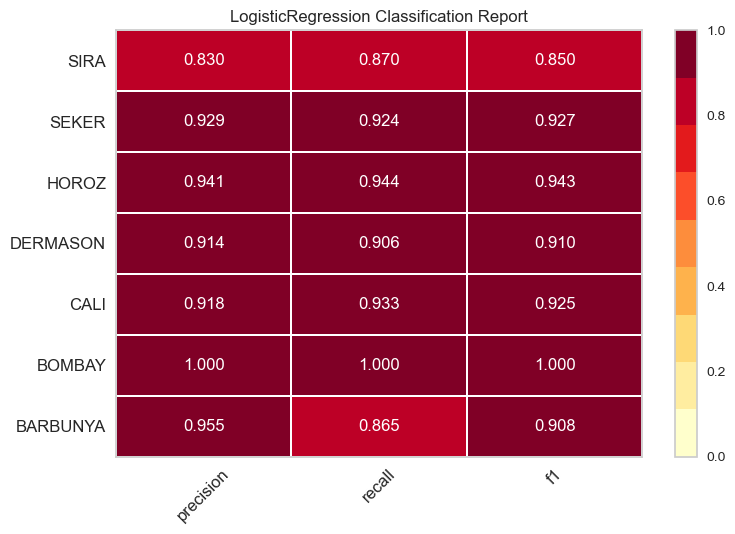

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [73]:
#LogisticRegression(solver='lbfgs')
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport( LogisticRegression(solver='lbfgs'),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


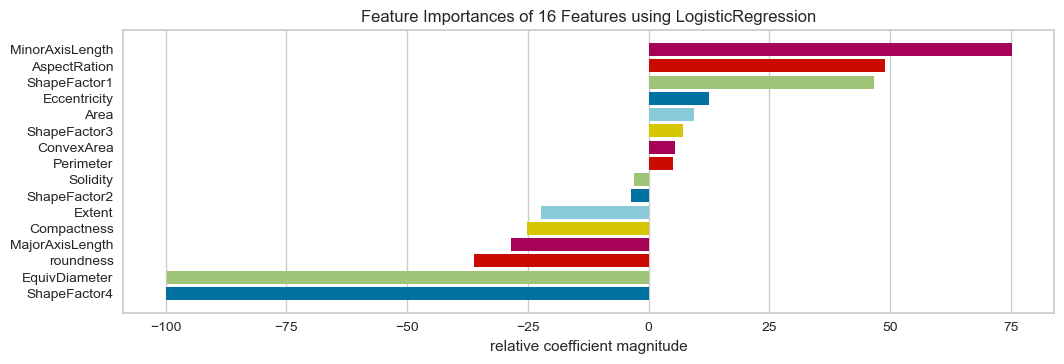

<AxesSubplot:title={'center':'Feature Importances of 16 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [74]:
from yellowbrick.features import FeatureImportances
viz = FeatureImportances( LogisticRegression(solver='lbfgs'), size=(1080, 380), labels=labels)
viz.fit(X, y)
viz.show()

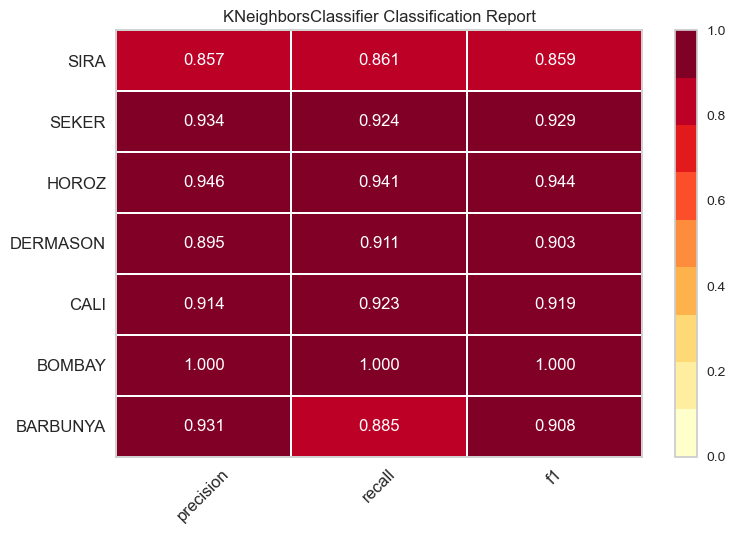

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [75]:
#KNeighborsClassifier()
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport( KNeighborsClassifier(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

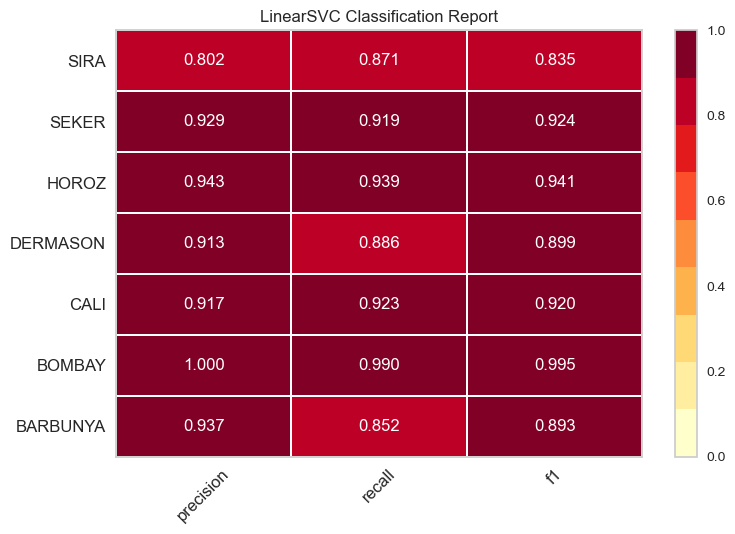

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [76]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport( LinearSVC(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


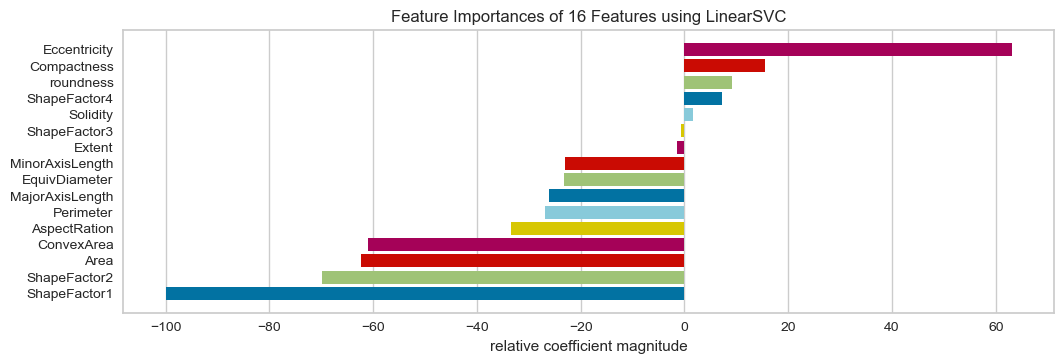

<AxesSubplot:title={'center':'Feature Importances of 16 Features using LinearSVC'}, xlabel='relative coefficient magnitude'>

In [77]:
from yellowbrick.features import FeatureImportances
viz = FeatureImportances( LinearSVC(), size=(1080, 380), labels=labels)
viz.fit(X, y)
viz.show()

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ClassPredictionError



e=RandomForestClassifier(n_estimators=10)
def prediction_error(X,y,e):
    classes = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']

# Perform 80/20 training/test split
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)

# Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(
    e, 
    classes=classes, size=(360, 360)
    )

# Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
    visualizer.score(X_test, y_test)

# Draw visualization
    visualizer.show()
#prediction_error(X,y,e)

In [89]:
#to make sure eveyone have the same results from different machine 
import numpy as np
np.random.seed(100)

In [90]:
# Try them all!
models = [ ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_method(X, y, model)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].